# 0. IMPORTS

In [1]:
import pandas as pd
import inflection
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
# O low_memory=False serve para ler o arquivo todo na hora, e não pedaço por pedaço.

df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge - fazendo o merge dos dois arquivos
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# df_sales_raw = o primeiro argumento, o arquivo que vai ser a referência
# df_store_raw = o segundo argumento, o arquivo que será anexado a essa referência
# how='left' = o terceiro argumento, como que eu quero fazer esse merge
# on='Store' = o quarto argumento, a coluna que é igual nos dois datasets, será a chave para o merge

In [3]:
df_raw.sample()
# método que puxa uma linha aleatória do arquivo, para descobrir se ele realmente foi criado

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
17556,832,4,2015-07-16,6283,496,1,1,0,0,d,a,5070.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


# 1. DATA DESCRIPTION

In [4]:
df1 = df_raw.copy()
# Fazer uma cópia do dataset a cada mudança de seção, pois podemos trabalhar em notebooks imensos sem risco de sobreescrever
# os dados originais.

## 1.1 Rename Columns

Para que renomear as colunas? É importante para o cientista de dados localizar facilmente as colunas para realizar o seu trabalho. É possível que algumas colunas nomeadas pelo programador inicial, tenham nomes muito grandes ou que não representam exatamente aquela informação da forma mais adequada para ser trabalhada em uma análise de dados.

In [5]:
df_raw.columns
# Ainda podemos perceber que essa base de dados tem colunas bem nomeadas. Claro que estar no kaggle ajuda nisso.
# No mundo dos negócios real, pode estar mais confuso.

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

# Vamos criar a função snakecase para alterar o estilo de escrita das colunas.
# O inflection.underscore(x) deixa todas as letras minúsculas.

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase,cols_old))
# map faz o mapeamento da função snakecase em todas as palavras da lista cols_old
# retorno é uma list() para poder fazer o rename da coluna

# rename
df1.columns = cols_new

In [7]:
# Visualizando o efeito snakecase:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

Saber o tamanho do dataset.

In [8]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Data Types

Analisando o tipo de dado de cada coluna.

In [9]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

Podemos perceber que a coluna date está em formato object (string). Precisamos mudar isso.

In [10]:
# Vamos sobrescrever a coluna direto:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

Com o comando to_datetime, podemos perceber que agora a coluna date não é mais uma string e agora está em formato datetime64.

## 1.4 Check NA

In [11]:
# Mostra todas as linhas que têm pelo menos uma coluna NA. E soma as linhas por colunas.
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Existem 3 tipos de estratégias para substituir os dados faltantes: eliminar as colunas/linhas com NAs, substituir usando algoritmo de ML que infere valores aos NAs, ou conhecendo do negócio e imputar os valores a partir disso.

## 1.5 Fillout NA

Use a tecla Alt e o mouse para criar um cursor vertical que edita todas as linhas.
Cada coluna deve ser tratada de maneira própria, a partir do entendimento do seu significado. O cientista de dados deve resolver os NAs a partir do entendimento do negócio, a preocupação com o negócio precisa ser chave e bem comunicada com todos.

In [12]:
df1['competition_distance'].max()

75860.0

In [13]:
# competition_distance - Aqui, a estratégia foi colocar um outlier máximo em todos os NAs.

# 200000 if math.isnan(df1['competition_distance']) else df1['competition_distance']

# O lambda x é a mesma coisa que função de x, logo eu posso substituir o df1 por x.
# Aplico em todas as linhas do dataset com o apply.

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)

# competition_open_since_month  
# competition_open_since_year   
# promo2_since_week             
# promo2_since_year             
# promo_interval                

Chamando a soma das linhas NAs em cada coluna, percebemos que a coluna competition_distance não tem mais NAs.

In [14]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [15]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
887699,945,6,2013-04-27,3040,335,1,0,0,0,a,c,12480.0,3.0,2011.0,0,NaN,NaN,NaN


In [16]:
# competition_open_since_month - Aqui vamos extrair o mês dentro do date para o início da competição.

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
# O axis_1 significa que vou aplicar o comando ao longo das colunas, preciso colocar quando trabalho com mais de uma coluna.

# competition_open_since_year - A mesma lógica, só que em anos. Então vamos copiar a linha de código da coluna anterior
# e substituir o month por year.
# você pode substituir todos os month por year automaticamente colocando a linha em uma célula própria e >>>
# apertando ctrl + shift + p para abrir os comandos rápidos > chegar na função find/replace

df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week - nessa e na próxima coluna, vamos operar usando a mesma lógica do competition_open_since_month/year  
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year  
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

In [17]:
# promo_interval - aqui faremos um split dessa coluna, criarei uma lista. Se a data estiver dentro dessa lista, criarei uma 
# coluna falando que a promo2 foi ativa.

# 1 - Vamos criar o dicionário que será usado na futura coluna month_map. Ele substitui o número do mês (que está na coluna 
# date) pela abreviação do mês. 
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# 2 - substituir NAs por 0 fazendo modificação direta na coluna
df1['promo_interval'].fillna(0, inplace=True)

# 3 - criação da coluna month_map - números são substituídos pelas letras - aplicando o dicionário criado para fazer a tradução
df1['month_map'] = df1['date'].dt.month.map(month_map)

# 4 - split para quebrar os arrays separados por vírgulas em uma lista para ver se o mês do month_map está dentro dessa lista.
# Se sim, retorno 1. Apenas para lojas que estão participando da promo2.
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply (lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)
# o axis_1 é porque eu vou usar mais de uma coluna, aí preciso especificar a direção

In [18]:
df1.sample(5).T

# O ".T" (transposto) troca a visualização do dataset: a linha passa a ser vertical e a coluna fica horizontal.

,780625,897409,357387,43508,570344
store,911,620,466,24,250
day_of_week,4,4,7,1,3
date,2013-08-01 00:00:00,2013-04-18 00:00:00,2014-08-24 00:00:00,2015-06-22 00:00:00,2014-02-05 00:00:00
sales,11459,5799,0,7579,10511
customers,1021,560,0,683,713
open,1,1,0,1,1
promo,1,0,0,0,1
state_holiday,0,0,0,0,0
school_holiday,1,0,0,0,0
store_type,a,d,a,a,d


Aqui percebemos a criação das colunas month_map, que extrai o mês da coluna date, e da is_promo, que diz se o mês do month_map caiu em um dos meses da promo_interval (se tiver aderido a ela) ou não.

Se o mês do month_map estiver dentro da lista da promo_interval, coloca-se que tem promoção. Se não tiver, colocamos como 0.

Chamando a soma dos NAs, percebemos que o preenchimento dos NAs está concluído.

In [19]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

Agora vamos olhar como estão os tipos de dados das colunas agora. É possível que algo tenha se alterado nas mudanças feitas até agora.

In [20]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

Vamos trocar o tipo de dado dessas colunas de float para int:

In [21]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [22]:
# Trocados!
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical

Separando variáveis numéricas de categóricas:

In [23]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [24]:
# Observe como o dataframe num_attributes contém apenas as variáveis numéricas do df1.
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
629629,440,6,3675,379,1,0,0,3900.0,4,2005,1,45,2009,0
991002,553,4,4887,473,1,1,0,3040.0,9,2002,1,13,2010,1


In [25]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
444827,a,d,a,"Jan,Apr,Jul,Oct",May
708327,0,a,a,"Jan,Apr,Jul,Oct",Oct


### 1.7.1 Numerical Attributes

In [26]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T 
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Vou transpor com o .T para facilitar a visualização das métricas

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T 
d2 = pd.DataFrame(num_attributes.apply(min)).T 
d3 = pd.DataFrame(num_attributes.apply(max)).T 
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T # range
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T 
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T 

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index() # m de metrics
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] # naming columns

Agora preciso averiguar se as métricas coletadas fazem sentido para entender o negócio.

In [27]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


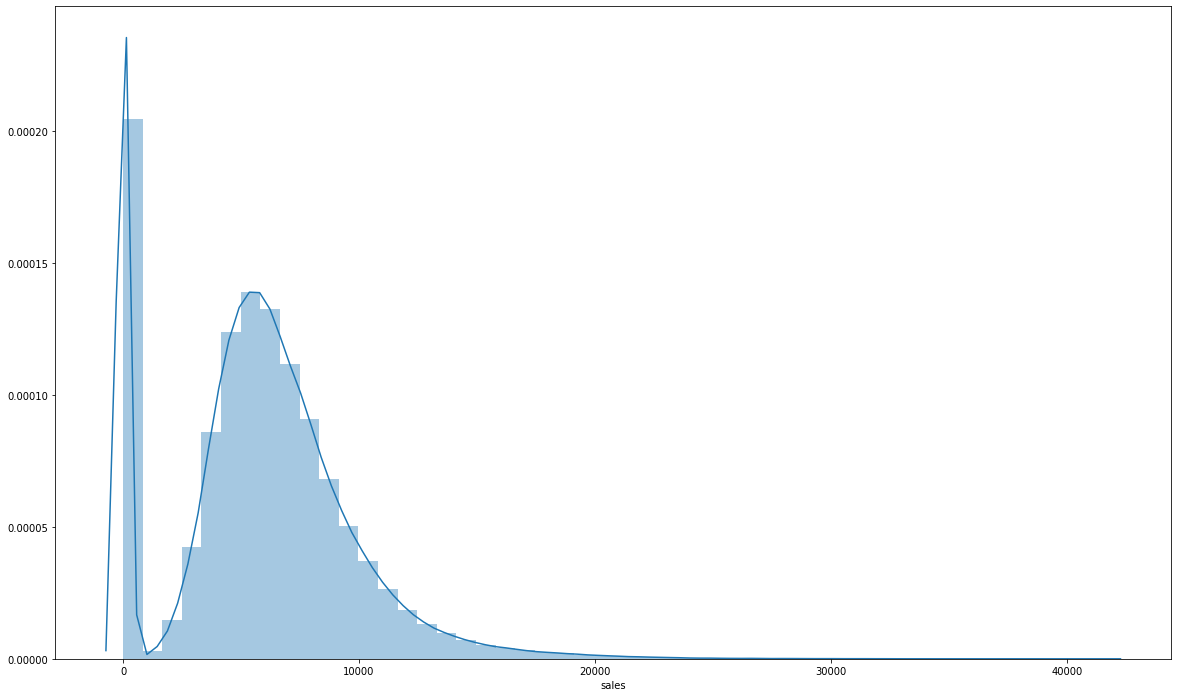

In [28]:
plt.figure(figsize=(20, 12))
sns.distplot(df1['sales'])
plt.show()
# A biblioteca seaborn instalada aqui está na versão 0.9. A partir da versão 0.11, a função muda de nome para displot.
# Para saber a versão da biblioteca instalada, é só colocar em um snippet: print(sns.__version__) 

No gráfico percebemos uma alta concentração dos valores, com a mediana um pouco deslocada para a esquerda (para baixo) devido à quantidade de lojas registradas com vendas 0. Tudo isso é corroborado pelos dados da coluna 'sales' no dataframe "m".

Agora vamos analisar a coluna (transformada em atributo e transposta em linha) 'competition_distance':

In [29]:
m.iloc[[7]]

,attributes,min,max,range,mean,median,std,skew,kurtosis
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712


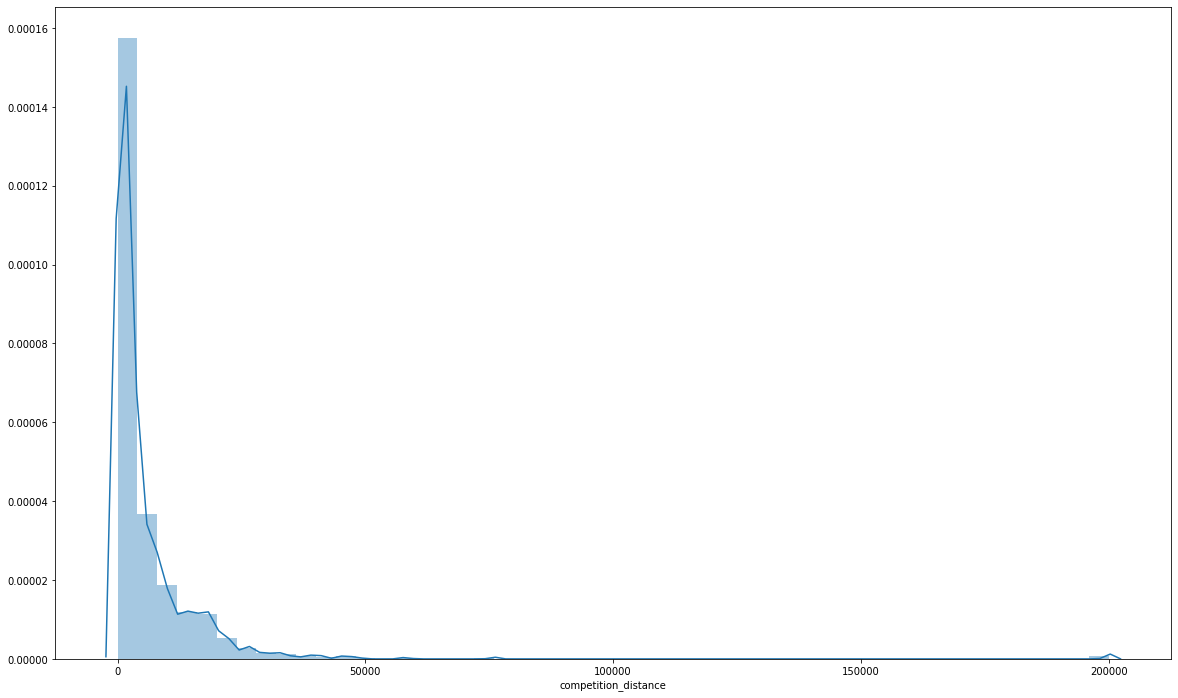

In [30]:
plt.figure(figsize=(20, 12))
sns.distplot(df1['competition_distance'])
plt.show()

Range grande, skew muito para a esquerda (mediana bem abaixo da média) e kurtosis bem alto (grande pico): as lojas, em sua grande maioria, estão a uma distância muito pequena umas das outras. Apenas algumas estão distantes.

### 1.7.2 Categorical Attributes

Primeiro vamos olhar quantos níveis cada variável categórica tem:

In [31]:
cat_attributes.apply(lambda x: x.unique().shape[0])
# assortment significa mix de variedade de produtos
# vamos estudar basicamente state_holiday, store_type e assortment

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

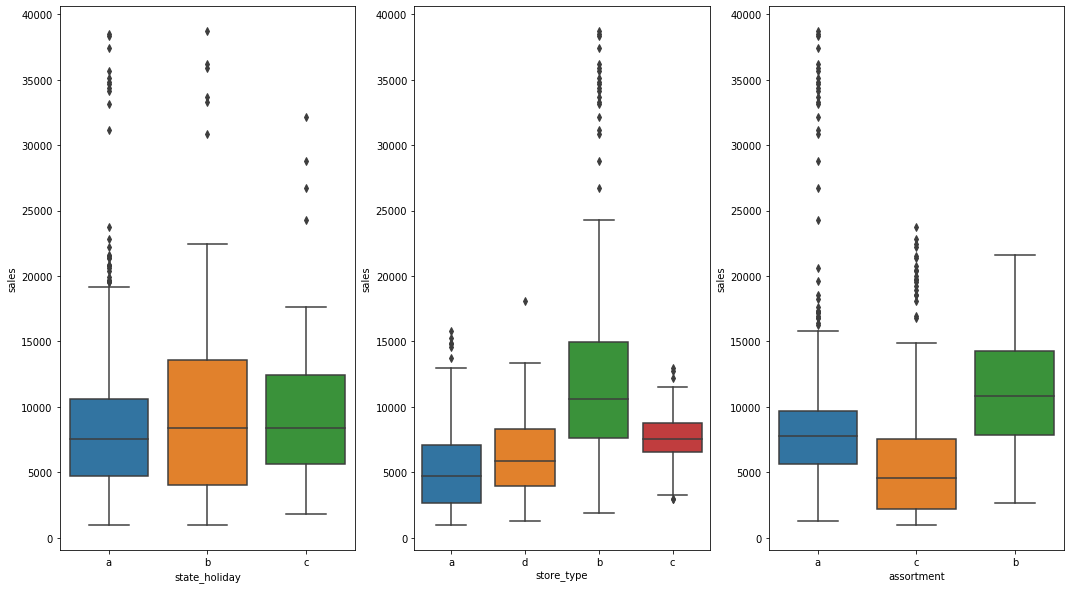

In [43]:
plt.figure(figsize=(18, 10))

# Vamos analisar as vendas por feriado em que as lojas abriram. Para isso tenho que colocar duas condicionais:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]
# o state_holiday não deve ser 0 (condição onde não é feriado). Atenção: O '0' está entre apóstrofes porque é uma string.
# Se ele fosse colocado sem as apóstrofes, a condição 0 continuaria aparecendo no gráfico.
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
# x é a linha que vai ficar como referência, o nome da categoria (variável categórica)
# y é o que eu quero medir (variável numérica)
# nesse primeiro boxplot, eu quero saber como está a dispersão das vendas em cada um dos níveis da variável categórica

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# plt.xlabel("state_holiday", fontsize=20) 
# plt.ylabel("Sales", fontsize=20) 
# plt.xticks(fontsize=18)  
# plt.yticks(fontsize=18)
# plt.show()

In [ ]:
# Esclarecendo e analisando os gráficos: 
# 1 - As retas que cortam os retângulos coloridos são as medianas.
# 2 - As partes de cima e de baixo das medianas (as duas partes dos retângulos) são o segundo e o terceiro quartis.
# 3 - As partes acima e abaixo dos retângulos coloridos até as linhas são o primeiro e o quarto quartis.
# 4 - Os pontos acima ou abaixo das linhas (geralmente acima) são os outliers, com valores 3X acima do desvio padrão.
# 5 - Dados como o store_type c mostram um grande pico de concentração.
# 6 - Dados como o store_type b mostram uma grande dispersão, principalmente no primeiro e segundo quartis. 

## 0.2 Loading Data

## 0.2 Loading Data

## 0.2 Loading Data